<div style="color:white;
           display:fill;
           border-radius:25px;
           background-color:Blue;
           font-size:210%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          text-align:center;"
          >
       WELCOME TO MY NOTEBOOK
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:25px;
           background-color:red;
           font-size:160%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          text-align:left;"
          >
      Importing Libraries
</p>
</div>



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<div style="color:white;
           display:fill;
           border-radius:25px;
           background-color:red;
           font-size:160%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          text-align:left;"
          >
      Reading Dataset and Inspecting 
</p>
</div>


In [300]:
df=pd.read_csv('data - data.csv')

In [199]:
print(df.shape) #Number of rows and columns

(6819, 96)


In [7]:
#Data types of different columns
#There are no categotical columns in our dataset
data_types=df.dtypes
int_columns = sum(data_types == 'int64')
float_columns = sum(data_types == 'float64')
object_columns = sum(data_types == 'object')

print(f'Number of int columns: {int_columns}')
print(f'Number of float columns: {float_columns}')
print(f'Number of object columns: {object_columns}')

Number of int columns: 3
Number of float columns: 93
Number of object columns: 0


In [201]:
# Check for null values in each column
null_columns = df.columns[df.isnull().any()]

# Print the names of columns with null values
print("Columns with null values:")
for column in null_columns:
    print(column)


Columns with null values:


### There are no null values in our dataset

In [204]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate potential outliers 
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Calculate percentage of outliers for each column
percentage_outliers = (outliers.sum() / len(df)) * 100

# Sort percentage_outliers Series in descending order
percentage_outliers_sorted = percentage_outliers.sort_values(ascending=False)

# Display sorted percentage of outliers for each column

print("Sorted percentage of outliers for each column (descending):")
print(percentage_outliers_sorted)

Sorted percentage of outliers for each column (descending):
Degree of Financial Leverage (DFL)                    22.041355
Interest Coverage Ratio (Interest expense to EBIT)    20.838833
Fixed Assets Turnover Frequency                       20.794838
Current Asset Turnover Rate                           20.516205
Total Asset Growth Rate                               20.252236
                                                        ...    
Quick Asset Turnover Rate                              0.000000
Cash Turnover Rate                                     0.000000
Operating Expense Rate                                 0.000000
Net Income Flag                                        0.000000
Inventory Turnover Rate (times)                        0.000000
Length: 96, dtype: float64


In [11]:
pd.set_option('display.max_rows', None)

In [203]:
pd.reset_option('display.max_rows')

In [ ]:
'''#As we can see the maximum outlier percentage is 22%
#and the outliers is not a bad thing. They can explain the variance in our data which normally
#distributed values fail to explain

#In our case which is bankruptcy declaration, the presence of outliers is essential for 
#considering different anomalies that can happen and different scenarios which influence bankruptcy
#So right now we wont be dropping outliers we will create our model using them

#For example the column - Degree of Financial Levergae- which denotes how much a company
#relies on debt to finance its operations have maximum percentage of outliers. But it is not
#adding any ghost value to our model as for different companies depending on their revenue ,
#the DFL may vary. DFL inturn depends upon other variable '''
'''X1 Cost of Interest-bearing Debt: 
The cost of debt directly impacts interest expenses, which are a component of the DFL calculation.

X6 Total Liability/Equity Ratio: 
This ratio reflects the extent to which a company relies on debt (liabilities) versus equity. 
Higher leverage (more debt relative to equity) increases financial risk and affects DFL.

X8 Interest-bearing Debt/Equity: 
Similar to X6, this ratio specifically measures the proportion of interest-bearing debt relative to equity, 
influencing interest expenses and hence DFL.
d the amount of debt.

X37 Interest Coverage Ratio: 
This ratio indicates a company's ability to pay interest on its outstanding debt. 
Higher ratios indicate better ability to cover interest expenses, potentially reducing financial risk and affecting DFL.

X68 Net Income to Stockholder's Equity: 
This ratio reflects the profitability of equity investments relative to net income, indirectly affecting DFL 
through its impact on equity returns.

X63 Retained Earnings to Total Assets: 
Retained earnings can influence equity levels, which in turn affect DFL calculations.'''

### There are no null values and there are medium percentage of outliers in dataset
### which is necessary to explain the variation

<div style="color:white;
           display:fill;
           border-radius:25px;
           background-color:red;
           font-size:160%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          text-align:left;"
          >
      EDA 
</p>
</div>


In [12]:
#Let's check whether our dataset is balanced or not
#Balanced means equal number of data points for each category - Bankrupt and Not Bankrupt
df["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

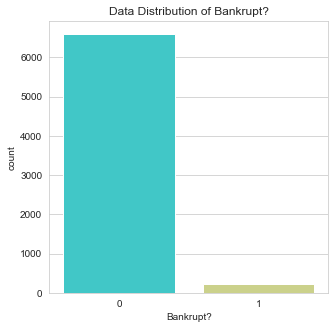

In [214]:
plt.figure(figsize=(5,5))
sns.countplot(x=df["Bankrupt?"], palette="rainbow")
plt.title("Data Distribution of Bankrupt?")
plt.savefig('Balance.png')
plt.show()

In [14]:
#Hence we can conculde that our dataset is unbalanced

In [30]:
#Measures of Central Tendency
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
#Here we can get the measure of mean , min value and max value  and standard deviation for all columns
#But we cant still compare which columns have less variation or are more close to mean
#We can do that by comparing co-effiecient of dispersion for different columns which is unitless
#Coefficient of dispersion = (std dev)/(mean)
#between standard deviation and mean absolute deviation based on the distribution of your data. 
#For normal distributions, standard deviation is typically used, 
#while mean absolute deviation is more robust for 
#non-normal distributions or when dealing with outliers.

In [15]:
mad = df.mad()

# Calculate Mean for each column
mean = df.mean()

# Calculate Coefficient of Variation (CV) for each column
coefficient_of_variation = mad / mean

# Sort coefficients of variation in descending order
coefficient_of_variation_sorted = coefficient_of_variation.sort_values(ascending=False)

# Display sorted coefficients of variation
print("Coefficient of Variation (CV) for each column (descending order):")
print(coefficient_of_variation_sorted)

Coefficient of Variation (CV) for each column (descending order):
Current Ratio                                              1.999707
Fixed Assets to Assets                                     1.999706
Net Value Growth Rate                                      1.999413
Revenue per person                                         1.999413
Quick Assets/Current Liability                             1.999120
Revenue Per Share (Yuan ¥)                                 1.998533
Liability-Assets Flag                                      1.997654
Total debt/Total net worth                                 1.997654
Quick Ratio                                                1.997360
Allocation rate per person                                 1.996480
Average Collection Days                                    1.994721
Total assets to GNP price                                  1.994134
Accounts Receivable Turnover                               1.993547
Cash/Current Liability                            

In [212]:
# Get top 10 and bottom 10 columns based on coefficient of variation
top_10 = coefficient_of_variation_sorted.head(10)
bottom_10 = coefficient_of_variation_sorted.tail(10)

# Convert them to dataframes
top_10_df = pd.DataFrame(top_10, columns=['Coefficient of Variation (CV)'])
bottom_10_df = pd.DataFrame(bottom_10, columns=['Coefficient of Variation (CV)'])

# Define file paths
top_10_csv = 'top_10_coefficient_of_variation.csv'
bottom_10_csv = 'bottom_10_coefficient_of_variation.csv'

# Save top 10 and bottom 10 dataframes to CSV
top_10_df.to_csv(top_10_csv)
bottom_10_df.to_csv(bottom_10_csv)

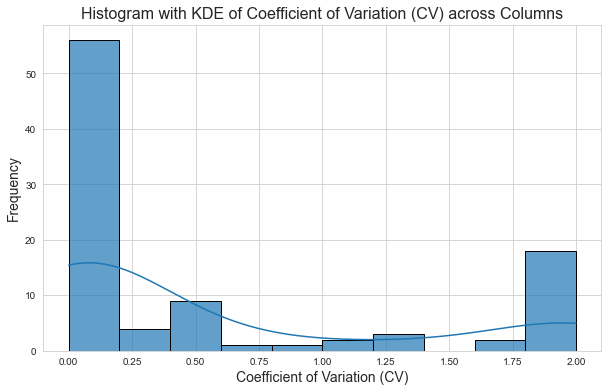

In [213]:
# Plotting histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(coefficient_of_variation, kde=True, bins=10, edgecolor='black', alpha=0.7)
plt.title('Histogram with KDE of Coefficient of Variation (CV) across Columns', fontsize=16)
plt.xlabel('Coefficient of Variation (CV)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig('Hist_CV.png')
plt.grid(True)
plt.show()

In [210]:

# Calculate skewness of coefficient of variation
cv_skewness = stats.skew(coefficient_of_variation)

print(f"Skewness of Coefficient of Variation (CV): {cv_skewness}")

#

Skewness of Coefficient of Variation (CV): 1.0572271390298318


In [ ]:
'''In short, a skewness value of 1.057 for the Coefficient of Variation (CV) histogram with KDE means
that the distribution of 
CV values across columns is moderately positively skewed. This suggests that there are more columns with higher 
coefficients of variation, indicating greater variability or dispersion in those 
datasets compared to columns with lower coefficients of variation. '''

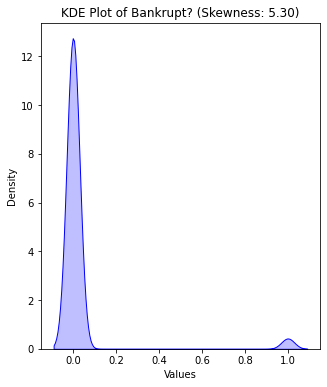

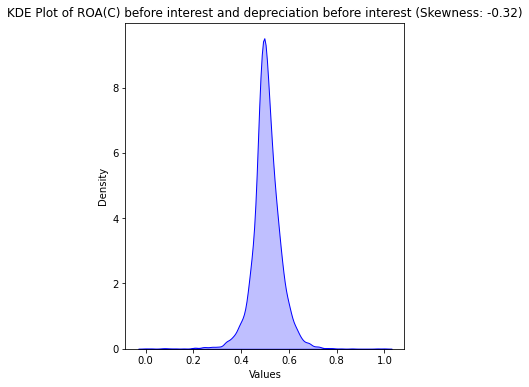

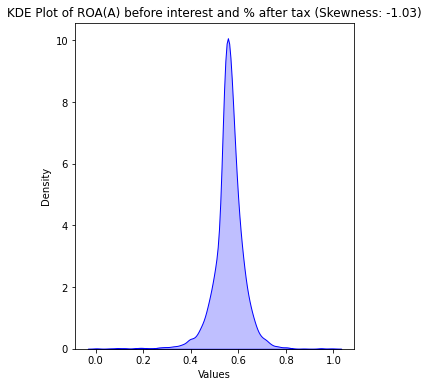

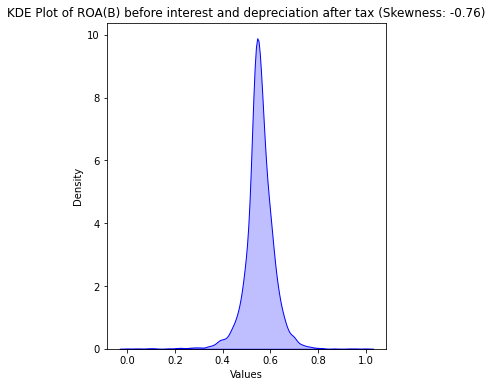

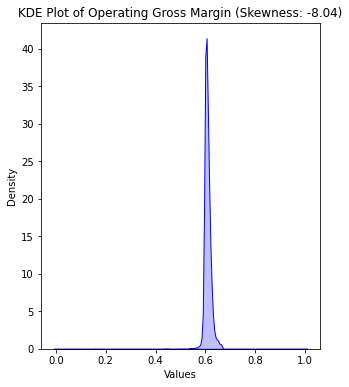

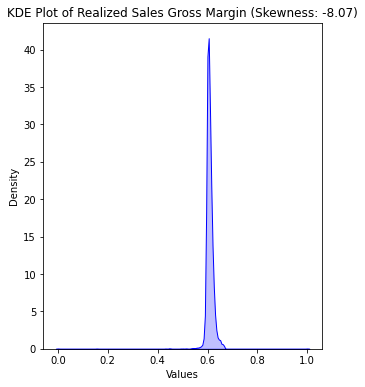

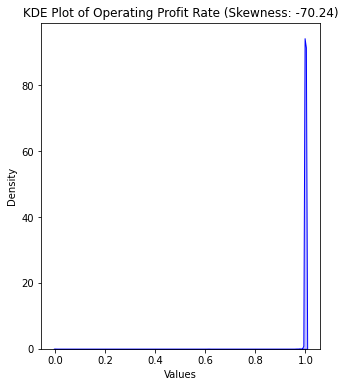

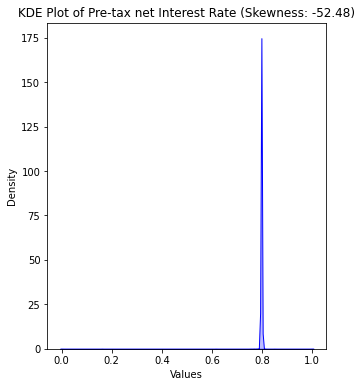

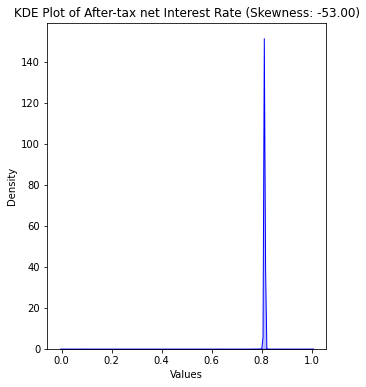

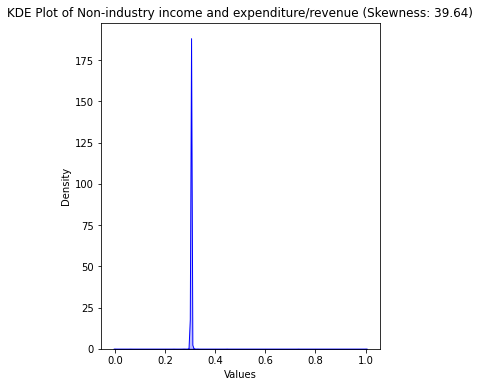

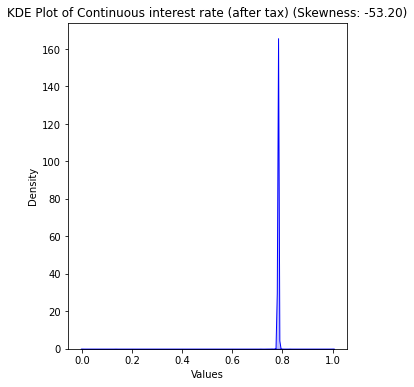

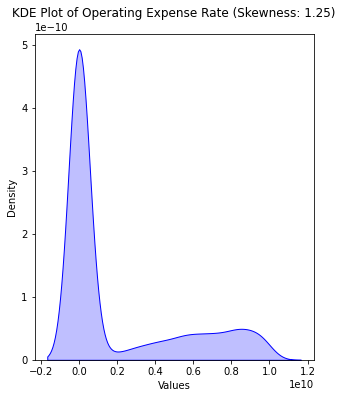

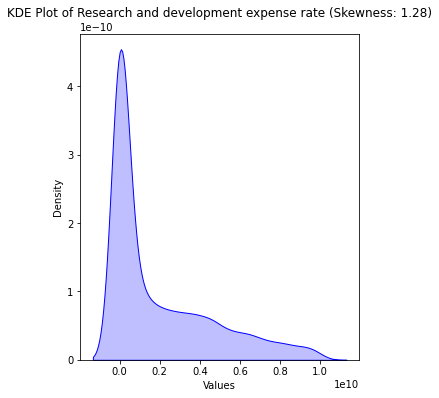

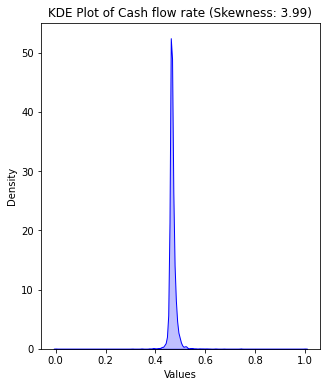

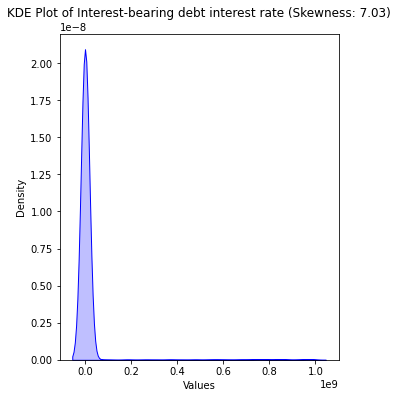

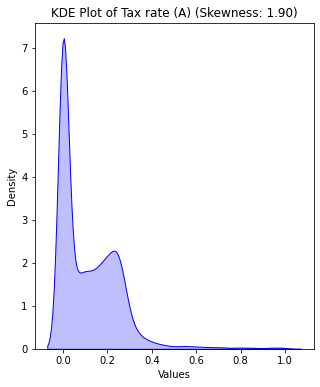

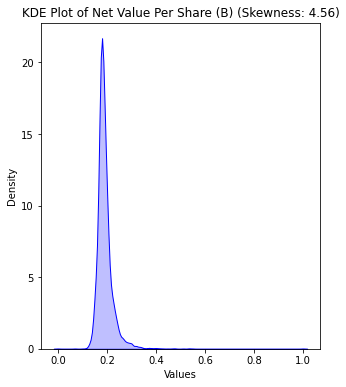

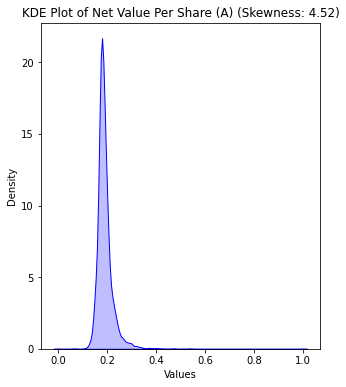

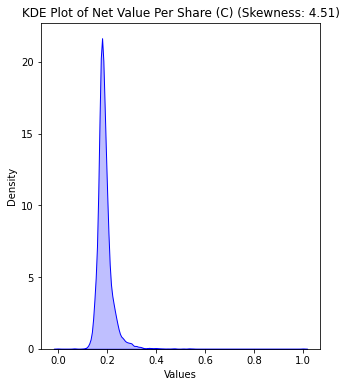

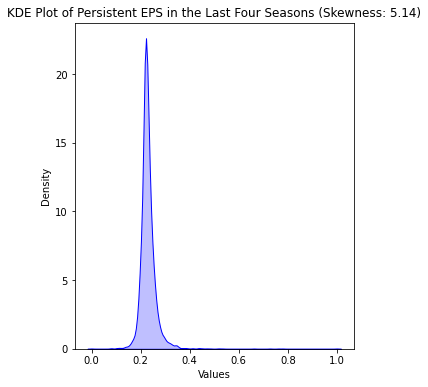

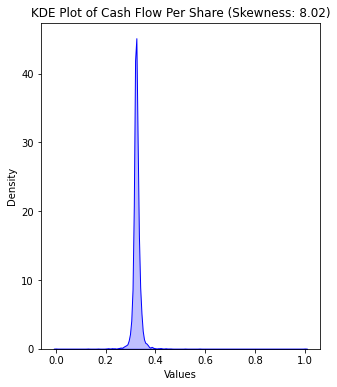

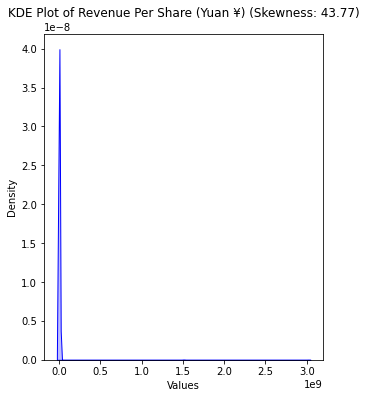

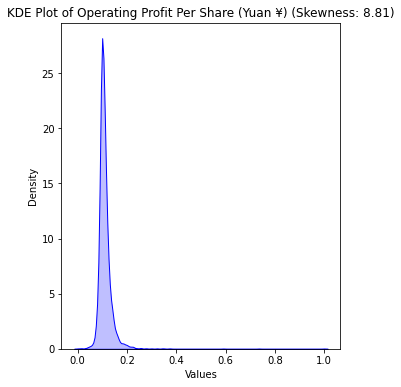

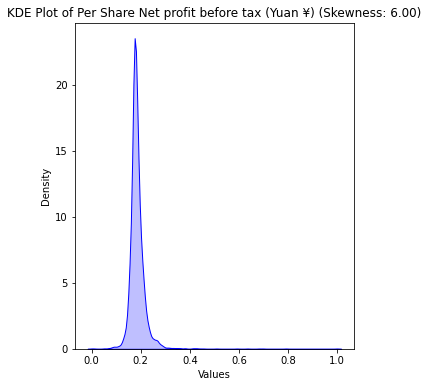

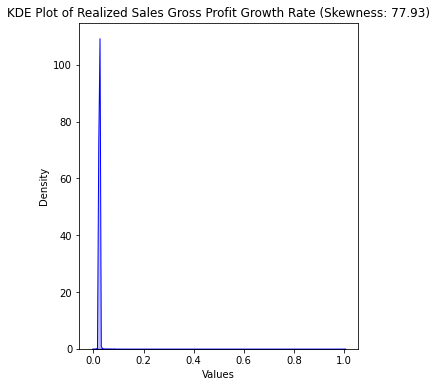

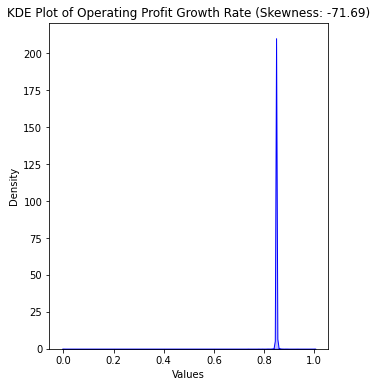

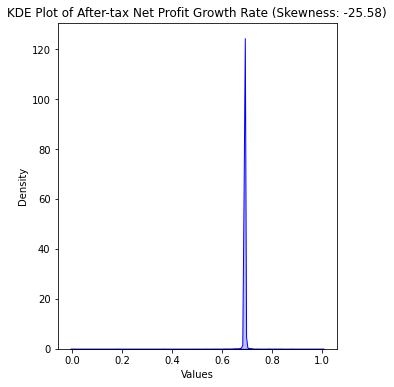

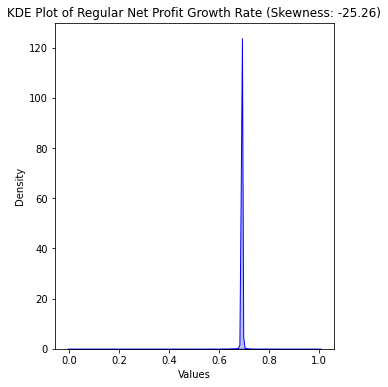

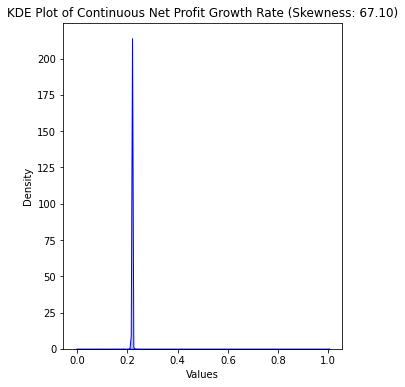

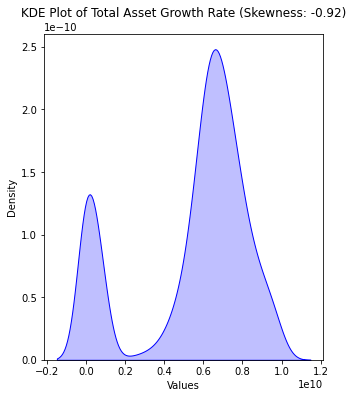

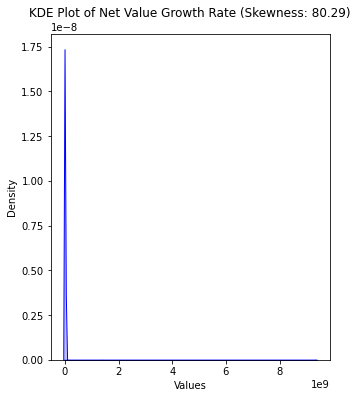

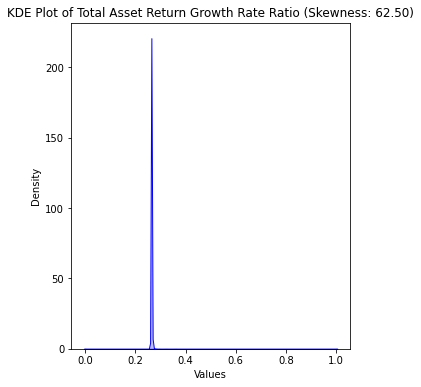

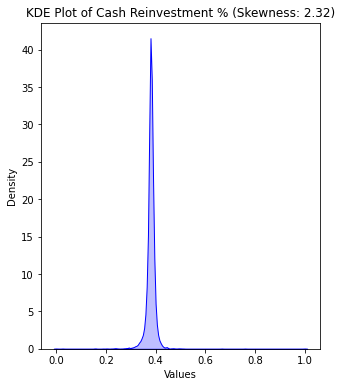

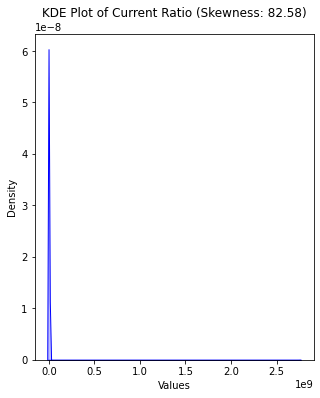

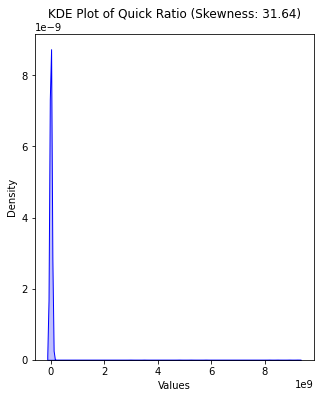

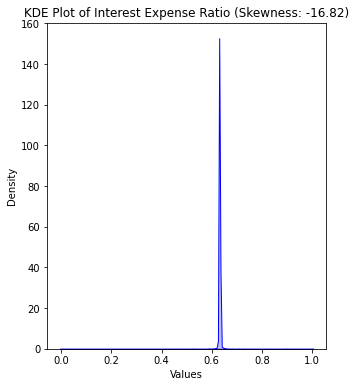

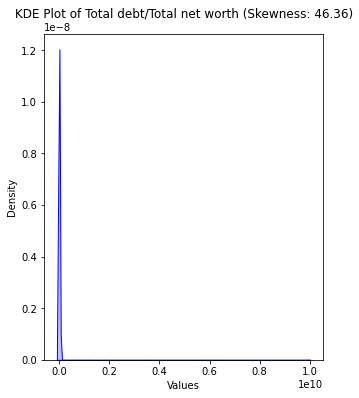

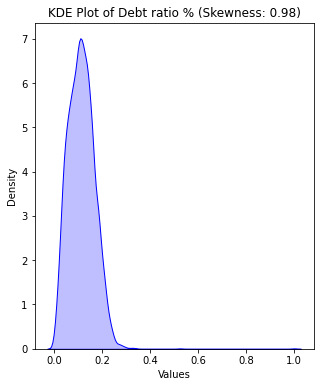

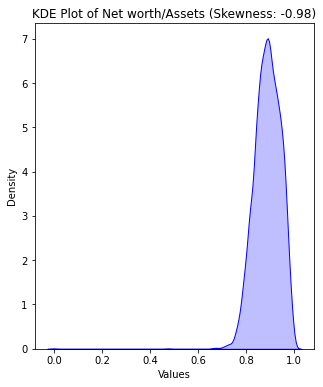

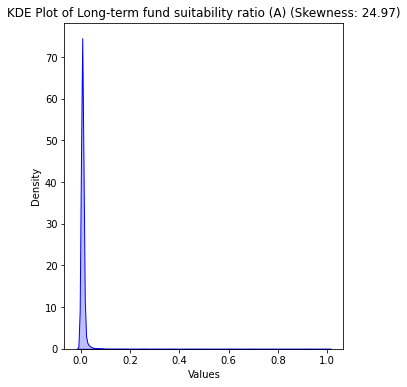

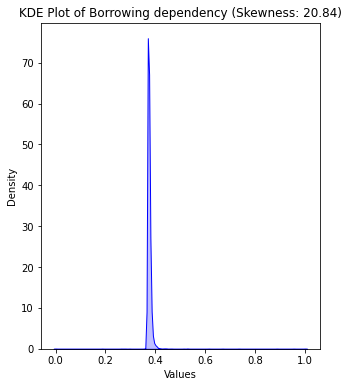

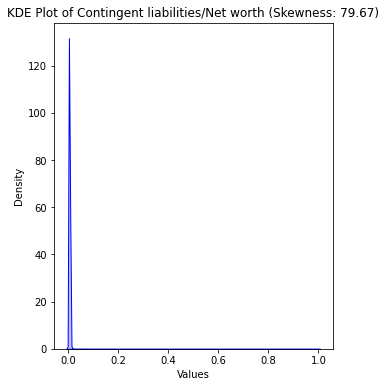

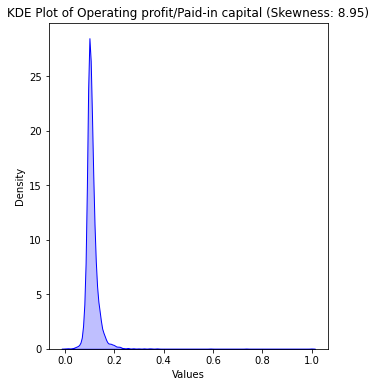

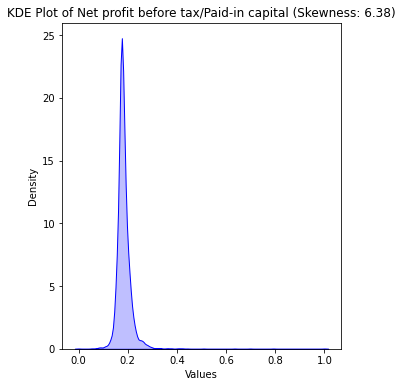

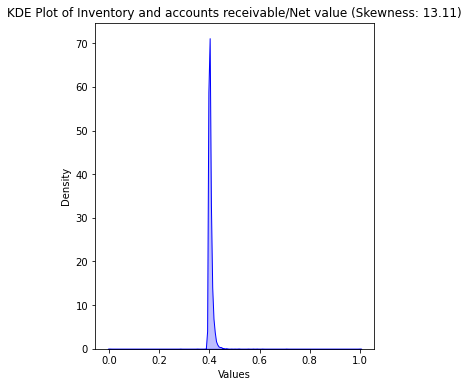

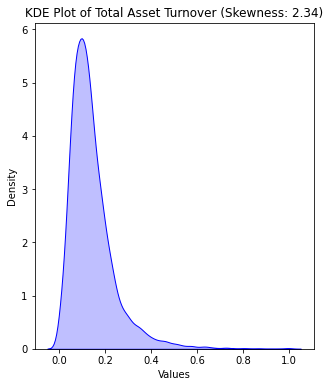

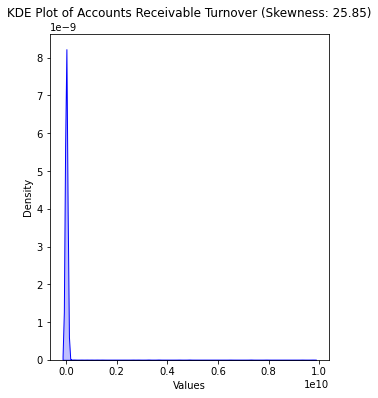

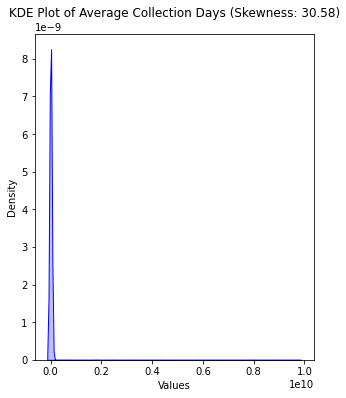

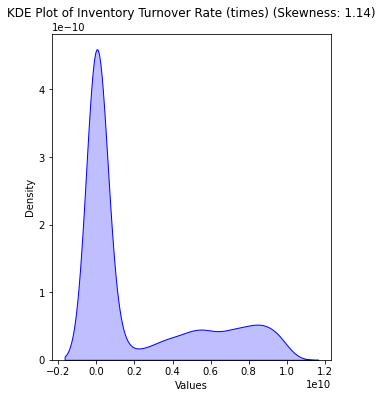

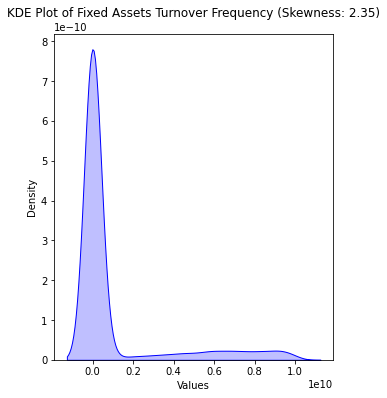

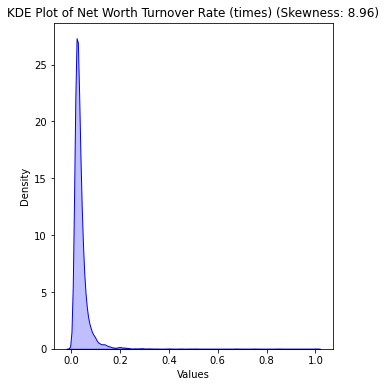

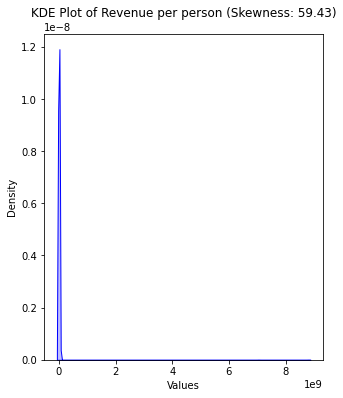

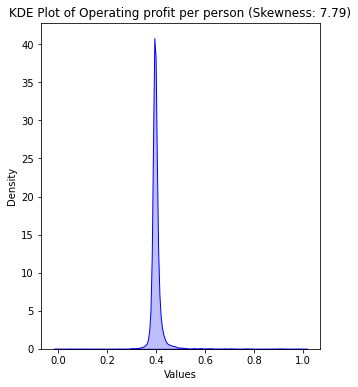

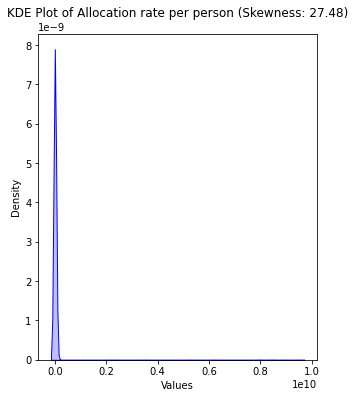

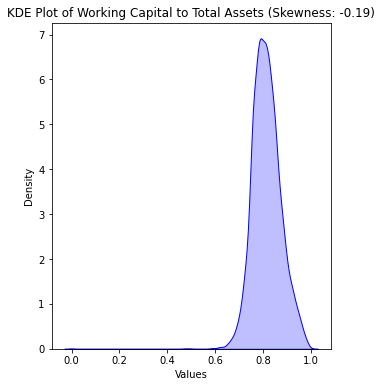

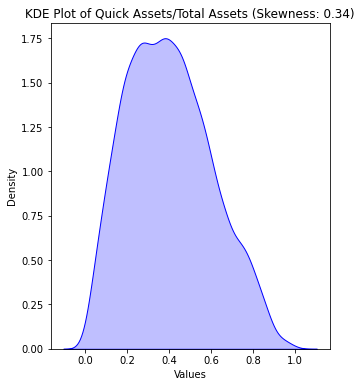

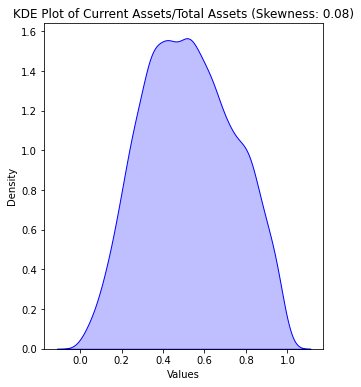

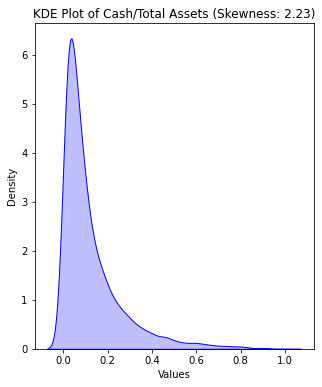

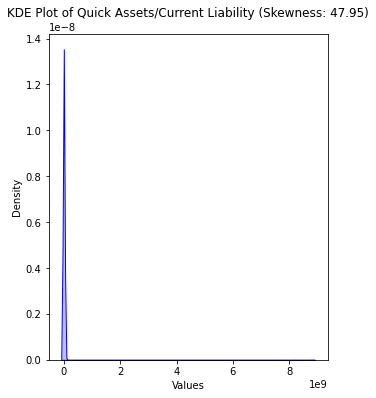

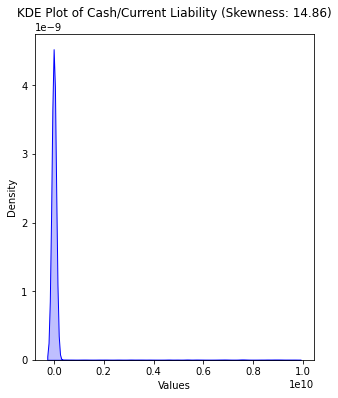

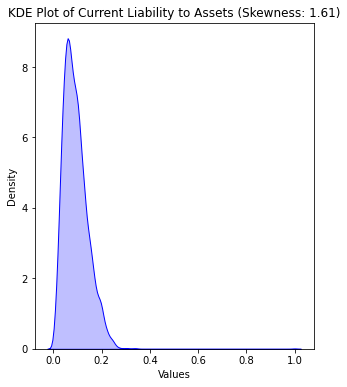

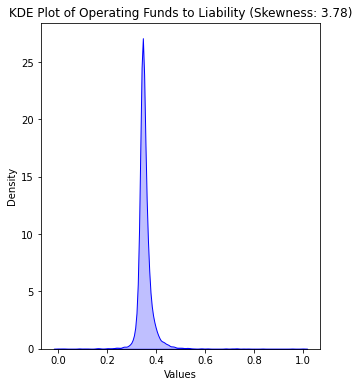

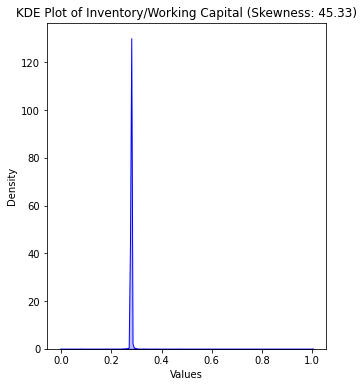

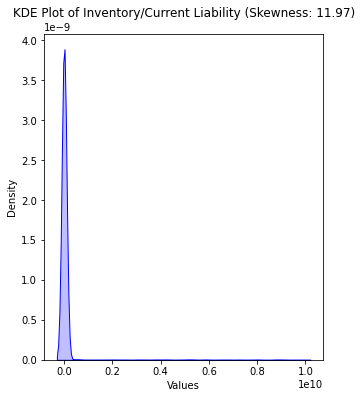

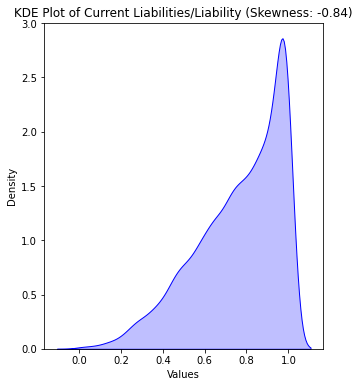

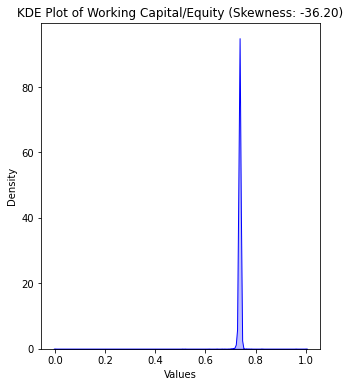

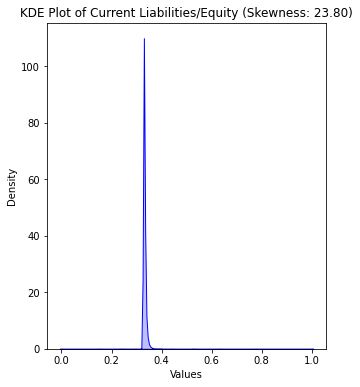

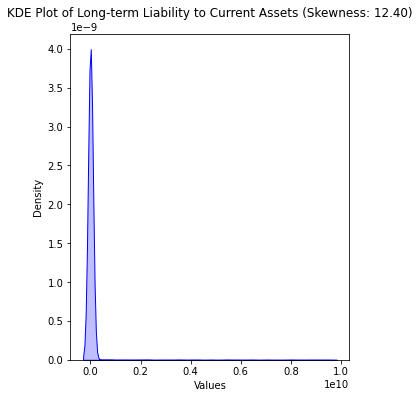

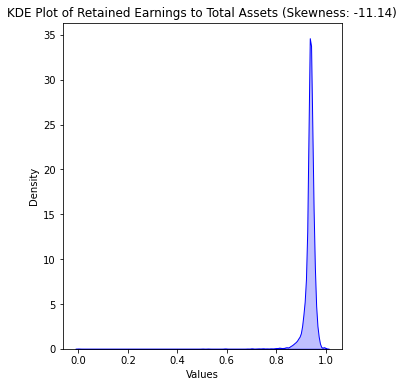

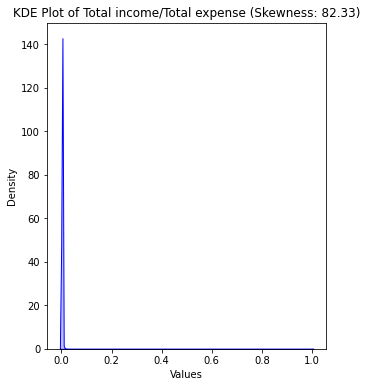

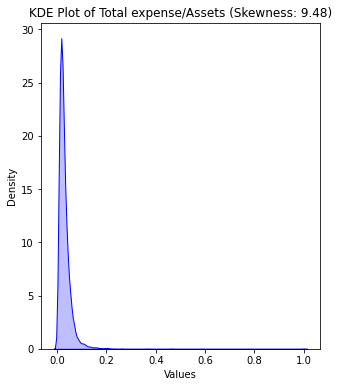

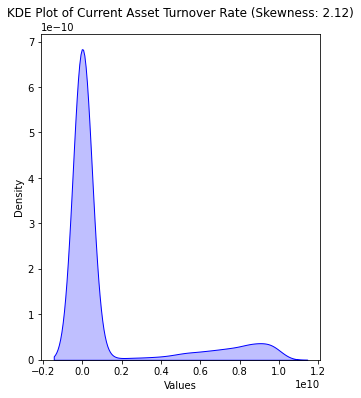

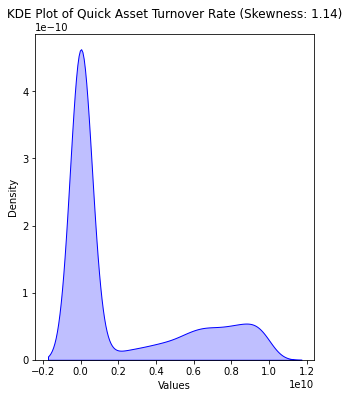

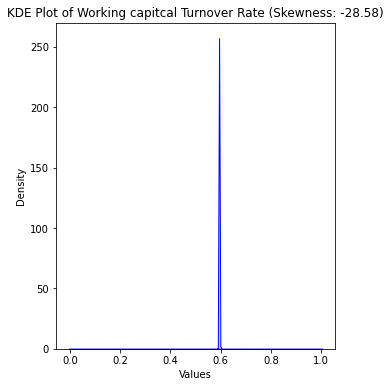

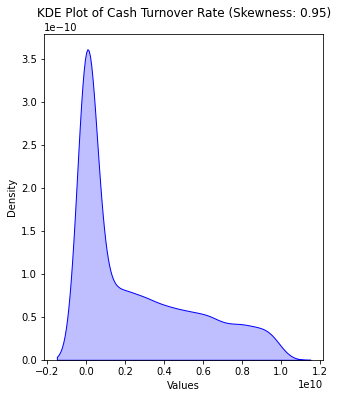

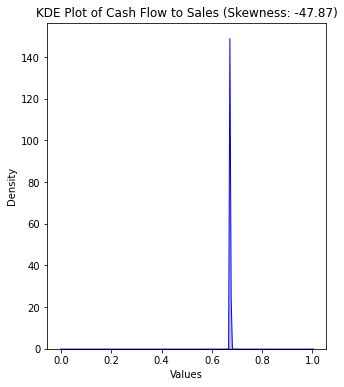

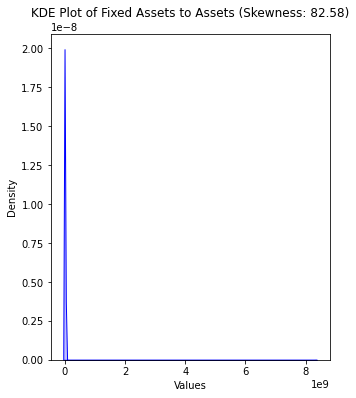

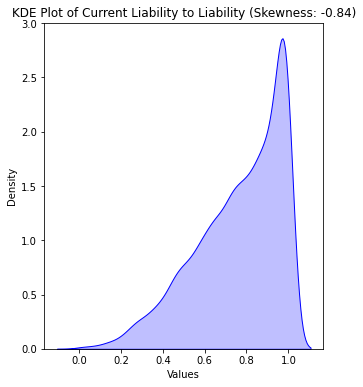

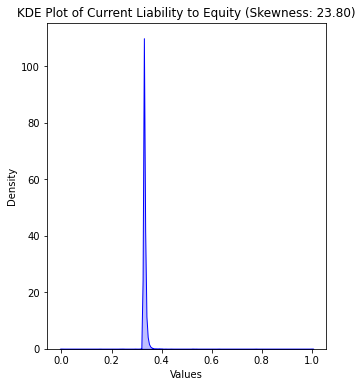

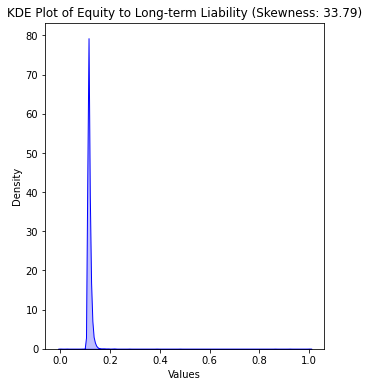

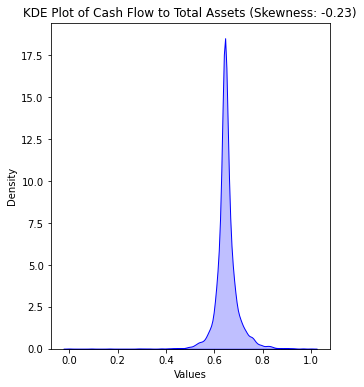

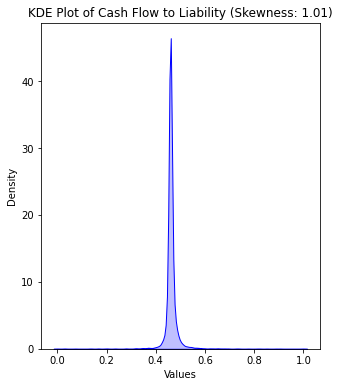

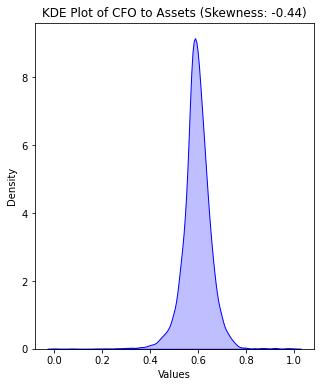

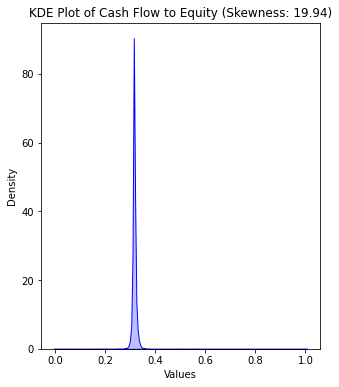

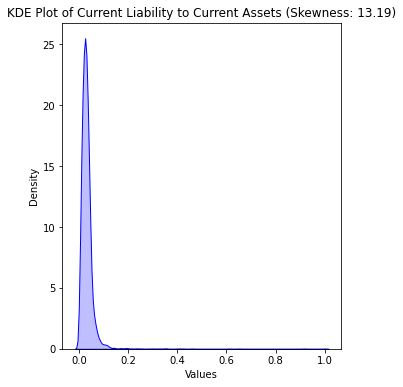

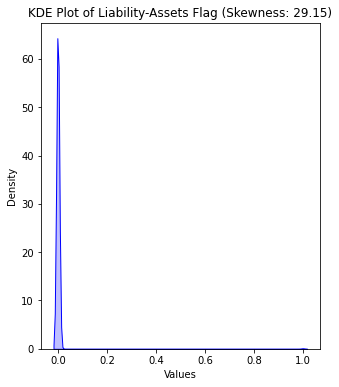

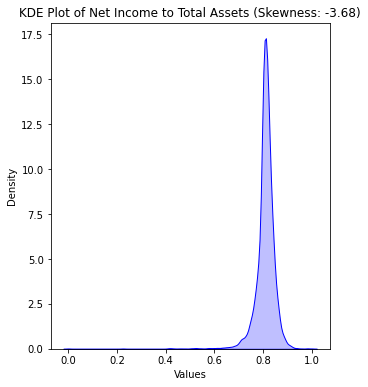

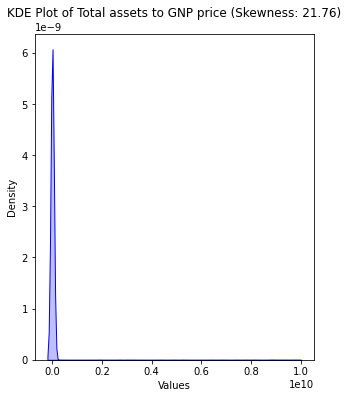

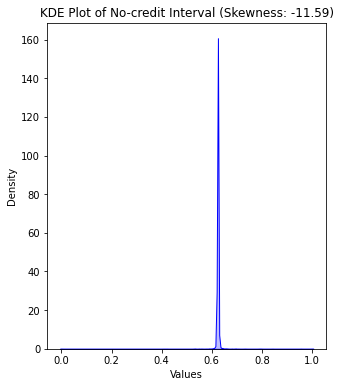

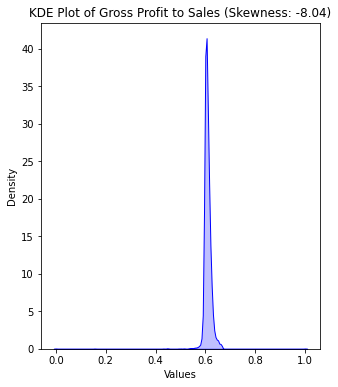

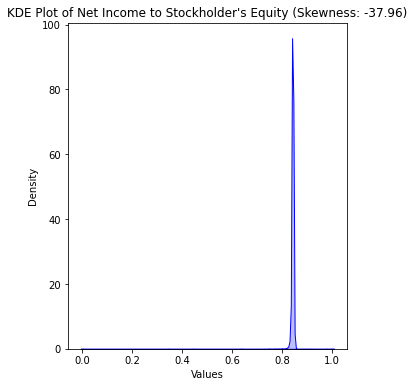

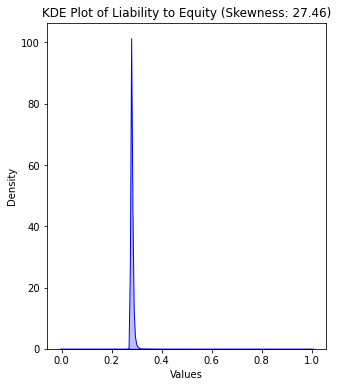

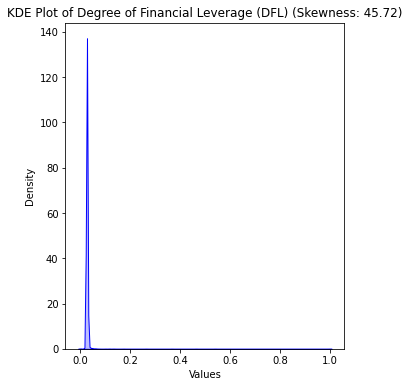

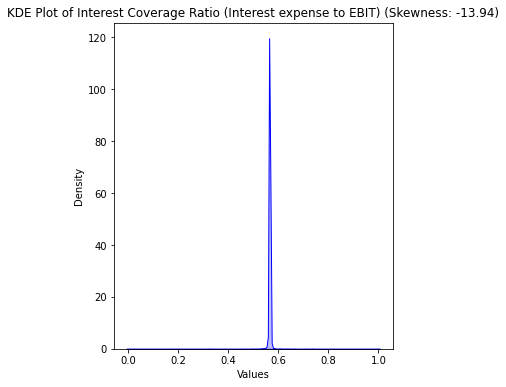

C:\Users\Lenovo\anaconda2\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


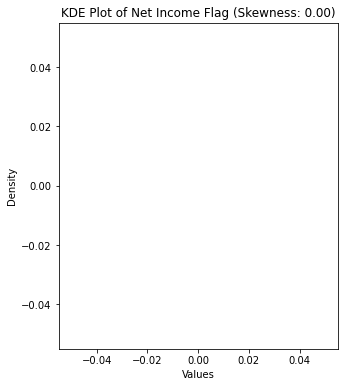

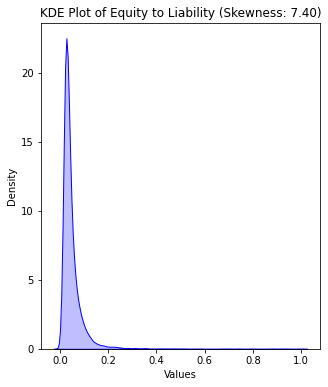

In [16]:
# Calculate skewness for each column
skewness = df.skew()

# Plot KDE plots for each column
for column in df.columns:
    plt.figure(figsize=(5, 6))
    sns.kdeplot(df[column], color='blue', shade=True)
    plt.title(f'KDE Plot of {column} (Skewness: {skewness[column]:.2f})')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.show()

In [303]:
# Identify highly positively skewed columns (skewness > 1)
pos_skew_cols = skewness[skewness > 1].sort_values(ascending=False)

# Identify highly negatively skewed columns (skewness < -1)
neg_skew_cols = skewness[skewness < -1].sort_values()

uniform_skew_cols=skewness[np.abs(skewness)<0.5].sort_values()

# Display results
print("Highly Positively Skewed Columns:")
print(len(pos_skew_cols))
print(pos_skew_cols.head())


Highly Positively Skewed Columns:
62
Fixed Assets to Assets              82.577237
Current Ratio                       82.577237
Total income/Total expense          82.332424
Net Value Growth Rate               80.291844
Contingent liabilities/Net worth    79.670620
dtype: float64


In [218]:
print(pos_skew_cols.index[:4])

Index(['Fixed Assets to Assets', 'Current Ratio', 'Total income/Total expense',
       'Net Value Growth Rate'],
      dtype='object')


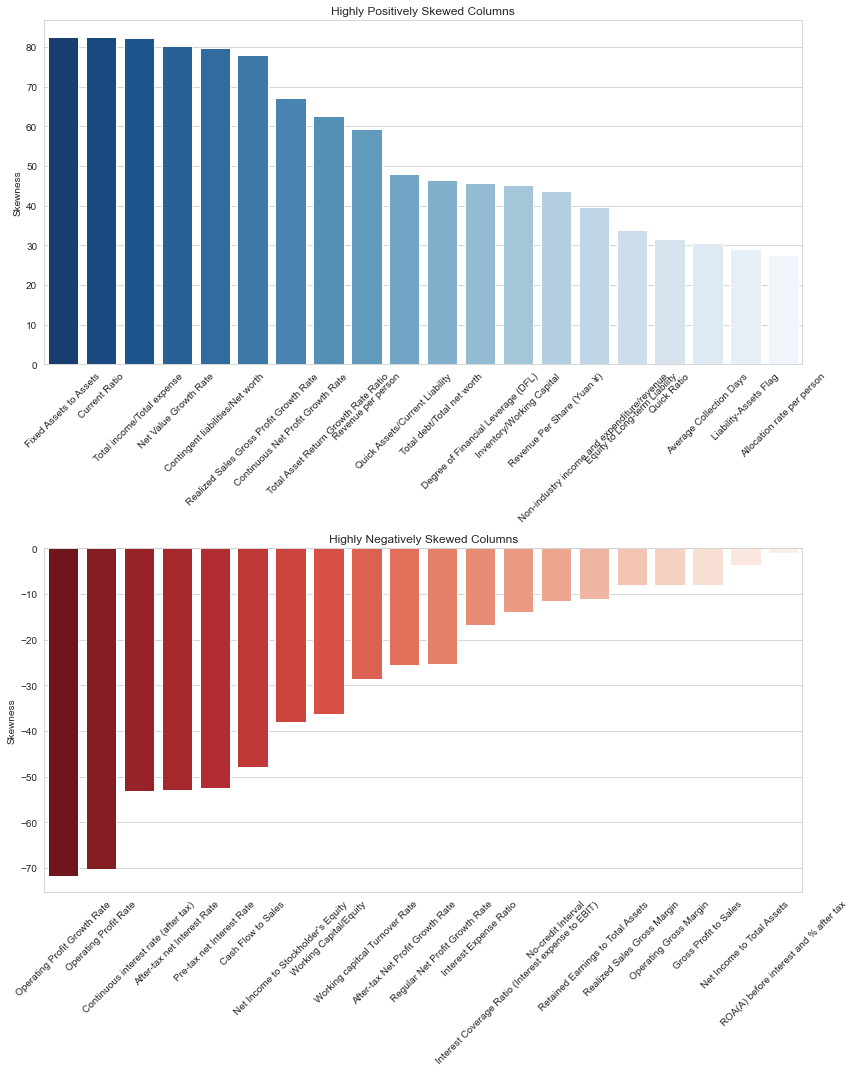

In [225]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 15))

# Plot positively skewed columns
sns.barplot(x=pos_skew_cols.index[:20], y=pos_skew_cols.values[:20], ax=axes[0], palette='Blues_r')
axes[0].set_title('Highly Positively Skewed Columns')
axes[0].set_ylabel('Skewness')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Plot negatively skewed columns
sns.barplot(x=neg_skew_cols.index, y=neg_skew_cols.values, ax=axes[1], palette='Reds_r')
axes[1].set_title('Highly Negatively Skewed Columns')
axes[1].set_ylabel('Skewness')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('Skewness.png')
# Show plot
plt.show()

In [ ]:
'''Heavily Positively Skewed Indicates that these columns have large number of value which 
are greater than the mean.

Possible Explanation:
1.The "Fixed Assets to Assets" ratio typically measures the proportion of a company's fixed assets (e.g., buildings, equipment) relative to its total assets.
 
Potential Reason for Skewness: Companies with large fixed asset bases relative to their total assets 
will have higher values for this ratio. 
In financial datasets, especially in industries with significant capital investments (like manufacturing), 
there may be a few companies with disproportionately high fixed asset values compared to others, 
leading to a skewed distribution where the mean is pulled towards higher values.

3. Total Income/Total Expense:
Ratio Interpretation: This ratio indicates how much income a company generates relative to its expenses.
Potential Reason for Skewness: Companies with high income relative to their expenses will have higher
values for this ratio. 
Economic factors, operational efficiency, and industry performance can lead to variations where some 
companies consistently outperform others, resulting in a skewed distribution with more values above the mean.

4.Net Value Growth Rate:
Growth Measurement: Net value growth rate measures the percentage change in the net value of an asset or entity 
over a specified period.
Potential Reason for Skewness: Companies experiencing rapid growth or recovery phases may exhibit 
high net value growth rates.
'''

In [19]:
print("Highly Negatively Skewed Columns:")
print(len(neg_skew_cols))
print(neg_skew_cols.head())

Highly Negatively Skewed Columns:
20
Operating Profit Growth Rate           -71.688950
Operating Profit Rate                  -70.237164
Continuous interest rate (after tax)   -53.200121
After-tax net Interest Rate            -52.995744
Pre-tax net Interest Rate              -52.482867
dtype: float64


In [ ]:
''''Heavily Negatively Skewed Indicates that these columns have large number of value which 
are lesser than the mean.

Operating Profit Growth Rate:
Definition: This ratio measures the percentage change in operating profit over a specific period.
Potential Reason for Negative Skewness: Companies experiencing declines or negative growth in operating profits
will have negative values for this ratio. 
Economic downturns, operational challenges, or sector-specific issues can lead to a higher 
frequency of negative growth rates, resulting in a skewed distribution where more values are below the mean.

2. Operating Profit Rate:
Profitability Measure: Operating profit rate calculates the proportion of operating profit relative to 
total revenue or assets.
Potential Reason for Negative Skewness: 
Industries or companies with lower operating profit margins relative to revenue or assets will have
lower values for this ratio. Sectors with high competition, cost pressures, or economic downturns 
may exhibit lower profitability ratios.

3.3. Continuous Interest Rate (After Tax):
Financial Cost Measure: This ratio assesses the effective interest rate paid on debt after 
accounting for taxes.
Potential Reason for Negative Skewness: Companies or industries with high debt levels relative to 
earnings might have higher continuous interest rates after tax. 
Economic factors, borrowing terms, or financial policies can lead to variations where some companies 
consistently face higher interest costs.'''

In [307]:
uniform_skew_cols=uniform_skew_cols.index

C:\Users\Lenovo\anaconda2\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


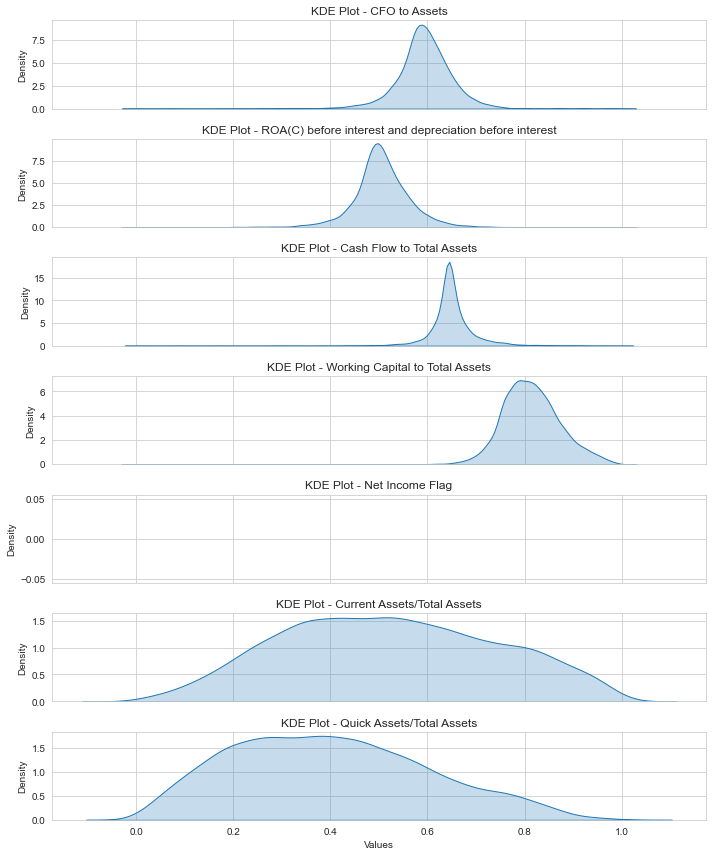

In [308]:
# Create figure and axes for subplots
fig, axes = plt.subplots(nrows=len(uniform_skew_cols), figsize=(10, 12), sharex=True)

# Plot each column's KDE plot in a subplot
for i, col in enumerate(uniform_skew_cols):
    sns.kdeplot(df[col], shade=True, ax=axes[i])  # Replace df with your DataFrame
    axes[i].set_title(f'KDE Plot - {col}', fontsize=12)
    axes[i].set_xlabel('Values', fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)

plt.tight_layout()
plt.savefig('All_KDE_Plots.png')  # Save all plots in one image
plt.show()

<div style="color:white;
           display:fill;
           border-radius:25px;
           background-color:red;
           font-size:160%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          text-align:left;"
          >
      Hypothesis Testing
</p>
</div>


In [301]:
import scipy.stats as stats

bankrupt = df[df['Bankrupt?'] == 1]
non_bankrupt = df[df['Bankrupt?'] == 0]

significant_columns = []

for column in df.columns:
    if column != 'Bankrupt?':
        stat, p = stats.ttest_ind(bankrupt[column], non_bankrupt[column])
        if p < 0.05:
            significant_columns.append((column, p))

# Sort significant columns by p-value in descending order
significant_columns.sort(key=lambda x: x[1], reverse=True)
# Get bottom 10 columns with their p-values
bottom_10_columns = significant_columns[:10]

# Convert bottom_10_columns to a DataFrame
df_bottom_10 = pd.DataFrame(bottom_10_columns, columns=['Column', 'P-value'])

# Save the DataFrame to a CSV file
df_bottom_10.to_csv('bottom_10_significant_columns.csv', index=False)
# Print the sorted significant columns with p-value
for col, p_val in significant_columns:
    print(f'{col}: p-value={p_val}')

# Optionally, print just the column names sorted by descending p-value
sorted_columns = [col for col, p_val in significant_columns]
print("\nSorted significant columns (descending p-value):")

Research and development expense rate: p-value=0.045399294843875504
Quick Ratio: p-value=0.03852828193862813
Quick Asset Turnover Rate: p-value=0.03304164712043744
Total assets to GNP price: p-value=0.003741541763277774
Regular Net Profit Growth Rate: p-value=0.002358401731275675
After-tax Net Profit Growth Rate: p-value=0.0018051017031592625
Revenue per person: p-value=0.0010361034643449577
Cash Flow to Liability: p-value=0.00036782790903428403
Total Asset Growth Rate: p-value=0.00024242645830304467
Current Assets/Total Assets: p-value=0.00021342666045212852
Cash Reinvestment %: p-value=2.215704853290021e-05
Cash Flow to Equity: p-value=1.3032330893749223e-06
Net Value Growth Rate: p-value=6.682585147588889e-08
Fixed Assets to Assets: p-value=4.1996045638716317e-08
Total Asset Turnover: p-value=1.980445888772855e-08
Contingent liabilities/Net worth: p-value=5.741725338552339e-09
Cash Flow to Total Assets: p-value=5.738534697592841e-09
Cash flow rate: p-value=2.208652012981308e-09
Fixe

In [292]:
test2=df[['Bankrupt?','Research and development expense rate']]
'''Research and development expense rate: p-value=0.045399294843875504'''
X_train, X_test, y_train, y_test = train_test_split(test2.drop(columns=['Bankrupt?']), test2['Bankrupt?'], test_size=0.3, random_state=1)
X_train=sm.add_constant(X_train,prepend=False)
X_test=sm.add_constant(X_test,prepend=False)
mod2=sm.Logit(y_train,X_train).fit()
print(mod2.summary())

Optimization terminated successfully.
         Current function value: 0.138502
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Bankrupt?   No. Observations:                 4773
Model:                          Logit   Df Residuals:                     4771
Method:                           MLE   Df Model:                            1
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                0.003215
Time:                        19:51:57   Log-Likelihood:                -661.07
converged:                       True   LL-Null:                       -663.20
Covariance Type:            nonrobust   LLR p-value:                   0.03891
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Research and development expense rate    -0.7102      

In [ ]:
'''H0 - Bankruptcy does not depend on research and development expense rate
p value<0..05 which is 0.048 therefore Ho is rejected
Hence we can conclude, Bankruptcy depends on research and development expense rate'''

'''Bankrupt and R&D Expense have negatice co-relation means when 
R&D expense increases then bankruptcy will apprach 0 means no bankrupt
As the R&D Expense increases, the probability of response variable decreases as there is -ve corelation'''

In [293]:
test3=df[['Bankrupt?','Net Income to Total Assets']]
X_train, X_test, y_train, y_test = train_test_split(test3.drop(columns=['Bankrupt?']), test3['Bankrupt?'], test_size=0.2, random_state=10)
X_train=sm.add_constant(X_train,prepend=False)
X_test=sm.add_constant(X_test,prepend=False)
mod2=sm.Logit(y_train,X_train).fit()
print(mod2.summary())

Optimization terminated successfully.
         Current function value: 0.115016
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Bankrupt?   No. Observations:                 5455
Model:                          Logit   Df Residuals:                     5453
Method:                           MLE   Df Model:                            1
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.1674
Time:                        19:54:03   Log-Likelihood:                -627.41
converged:                       True   LL-Null:                       -753.53
Covariance Type:            nonrobust   LLR p-value:                 8.477e-57
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Net Income to Total Assets   -20.0775      1.420    -14.138      0.000     -

In [ ]:
'''H0 - Bankruptcy does not depend on Net Income to Total Assets
p value<0.05 which is 0.000 therefore Ho is rejected
Hence we can conclude, Bankruptcy depends on Net Income to Total Assets

As the value of Net Income to total assets increases by one unit, the log of
likelihood of bankruptcy=1 decreases by -20'''

In [294]:

test4=df[['Bankrupt?','Current Liability to Assets']]
X_train, X_test, y_train, y_test = train_test_split(test4.drop(columns=['Bankrupt?']), test4['Bankrupt?'], test_size=0.2, random_state=10)
X_train=sm.add_constant(X_train,prepend=False)
X_test=sm.add_constant(X_test,prepend=False)
mod3=sm.Logit(y_train,X_train).fit()
print(mod3.summary())

Optimization terminated successfully.
         Current function value: 0.123602
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Bankrupt?   No. Observations:                 5455
Model:                          Logit   Df Residuals:                     5453
Method:                           MLE   Df Model:                            1
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.1052
Time:                        19:55:28   Log-Likelihood:                -674.25
converged:                       True   LL-Null:                       -753.53
Covariance Type:            nonrobust   LLR p-value:                 2.345e-36
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Current Liability to Assets    17.0380      1.367     12.468      0.000   

In [ ]:
'''H0 - Bankruptcy does not depend on Current Liability to Assets
p value<0.05 which is 0.000 therefore Ho is rejected
Hence we can conclude, Bankruptcy depends on Current Liability to Assets

As the value of Net Income to total assets increases by one unit, the log of
likelihood of bankruptcy=1 increases by 17.0380''''''

<div style="color:white;
           display:fill;
           border-radius:25px;
           background-color:red;
           font-size:160%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          text-align:left;"
          >
      Feature Engineering 
</p>
</div>


In [ ]:
'''Let us take 2 lists- 
Profit Indicators- value increases , profitability increases and bankruptcy decreases
Loss Indicators- value increases , profitability decreases and bankruptcy increases'''

In [ ]:
'''For our dataset - we can provide inference on how many companies are profitable
based on features given

20 columns are highly negatively skewed
62 columns are highly positively skewed''''

In [23]:
Profit_Indicators = [
    'ROA(C) before interest and depreciation before interest',
    'ROA(A) before interest and % after tax',
    'ROA(B) before interest and depreciation after tax',
    'Operating Gross Margin',
    'Realized Sales Gross Margin',
    'Operating Profit Rate',
    'Pre-tax net Interest Rate',
    'After-tax net Interest Rate',
    'Non-industry income and expenditure/revenue',
    'Continuous interest rate (after tax)',
    'Cash flow rate',
    'Net Value Per Share (B)',
    'Net Value Per Share (A)',
    'Net Value Per Share (C)',
    'Persistent EPS in the Last Four Seasons',
    'Cash Flow Per Share',
    'Revenue Per Share (Yuan ¥)',
    'Operating Profit Per Share (Yuan ¥)',
    'Per Share Net profit before tax (Yuan ¥)',
    'Realized Sales Gross Profit Growth Rate',
    'Operating Profit Growth Rate',
    'After-tax Net Profit Growth Rate',
    'Regular Net Profit Growth Rate',
    'Continuous Net Profit Growth Rate',
    'Total Asset Growth Rate',
    'Net Value Growth Rate',
    'Total Asset Return Growth Rate Ratio',
    'Cash Reinvestment %',
    'Current Ratio',
    'Quick Ratio',
    'Net worth/Assets',
    'Long-term fund suitability ratio (A)',
    'Operating profit/Paid-in capital',
    'Net profit before tax/Paid-in capital',
    'Total Asset Turnover',
    'Accounts Receivable Turnover',
    'Inventory Turnover Rate (times)',
    'Fixed Assets Turnover Frequency',
    'Net Worth Turnover Rate (times)',
    'Revenue per person',
    'Operating profit per person',
    'Allocation rate per person',
    'Working Capital to Total Assets',
    'Quick Assets/Total Assets',
    'Current Assets/Total Assets',
    'Cash/Total Assets',
    'Quick Assets/Current Liability',
    'Cash/Current Liability',
    'Operating Funds to Liability',
    'Retained Earnings to Total Assets',
    'Total income/Total expense',
    'Current Asset Turnover Rate',
    'Quick Asset Turnover Rate',
    'Working capitcal Turnover Rate',
    'Cash Turnover Rate',
    'Cash Flow to Sales',
    'Cash Flow to Total Assets',
    'Cash Flow to Liability',
    'CFO to Assets',
    'Cash Flow to Equity',
    'Net Income to Total Assets',
    'Total assets to GNP price',
    'No-credit Interval',
    'Gross Profit to Sales',
    'Net Income to Stockholder\'s Equity',
    'Interest Coverage Ratio (Interest expense to EBIT)',
    'Equity to Liability'
]

In [24]:
Loss_Indicators = [
    'Operating Expense Rate',
    'Research and development expense rate',
    'Interest-bearing debt interest rate',
    'Tax rate (A)',
    'Interest Expense Ratio',
    'Total debt/Total net worth',
    'Debt ratio %',
    'Borrowing dependency',
    'Contingent liabilities/Net worth',
    'Inventory and accounts receivable/Net value',
    'Average Collection Days',
    'Current Liability to Assets',
    'Inventory/Working Capital',
    'Inventory/Current Liability',
    'Current Liabilities/Liability',
    'Working Capital/Equity',
    'Current Liabilities/Equity',
    'Long-term Liability to Current Assets',
    'Total expense/Assets',
    'Fixed Assets to Assets',
    'Current Liability to Liability',
    'Current Liability to Equity',
    'Equity to Long-term Liability',
    'Current Liability to Current Assets',
    'Liability-Assets Flag',
    'Liability to Equity',
    'Degree of Financial Leverage (DFL)',
    'Net Income Flag'
]

In [30]:
loss=0
profit=0

In [26]:
len(Loss_Indicators)

28

In [27]:
len(Profit_Indicators)

67

In [28]:

for i in Profit_Indicators:
    if i in pos_skew_cols.index:
        profit+=1
    elif i in neg_skew_cols.index:
        loss+=1
print(profit)
print(loss)

39
18


In [77]:
#Out of 67 Profit Indicators -
# 39 profit Indicators are Higly Positively Skewed means 
#these 39 columns are decreasing the likelihood of bankruptcy

#17 Profit indicators are Highly Negatively Skwewed


In [31]:

for i in Loss_Indicators:
    if i in pos_skew_cols.index:
        loss+=1
    elif i in neg_skew_cols.index:
        profit+=1
print(profit)
print(loss)

2
22


In [ ]:
#Out of 28 Loss Indicators -
# 2 loss Indicators is Higly Positively Skewed means  
#these 1 columns is increasing the likelihood of bankruptcy

#22 Loss indicators are Highly Negatively Skwewed means
#22 columns are decreasing the frequency of bankruptcy

In [115]:
len(neg_skew_cols)

20

In [116]:
len(pos_skew_cols)

62

In [265]:
norm_df=df.copy()

In [299]:
#df.drop(columns=['isprofitable'],inplace=True)

In [302]:
df.shape

(6819, 96)

In [312]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your dataframe and you want to normalize all columns
scaler = MinMaxScaler()
df= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [313]:
# Assuming df is your dataframe containing profit and loss indicator columns

# Calculate scores for profit and loss indicators
df['profit_score'] = df[Profit_Indicators].mean(axis=1)
df['loss_score'] = df[Loss_Indicators].mean(axis=1)

# Define a threshold or rule
threshold = 0.07  # Adjust this threshold as per your criteria

# Create isprofitable column based on the rule
df['isprofitable'] = (df['profit_score'] > df['loss_score'] + threshold).astype(int)

# Optionally, drop intermediate score columns if not needed
df = df.drop(['profit_score', 'loss_score'], axis=1)




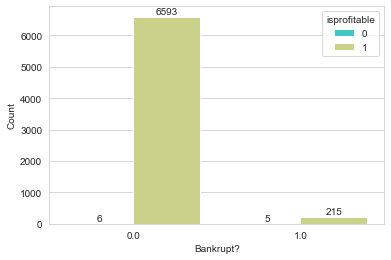

In [314]:
sns.set_style('whitegrid')
ax = sns.countplot(x='Bankrupt?', hue='isprofitable', data=df, palette='rainbow')

# Add counts on the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Bankrupt?')
plt.ylabel('Count')
plt.show()

In [315]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,isprofitable
0,1.0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,9.388432e-13,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.0,0.016469,1
1,1.0,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,8.475867e-13,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.0,0.020794,1
2,1.0,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,4.073610e-12,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.0,0.016474,1
3,1.0,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,3.312093e-13,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.0,0.023982,1
4,1.0,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,3.948639e-13,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.0,0.035490,1


In [316]:
crosstab = pd.crosstab(df['Bankrupt?'], df['isprofitable'])
print(crosstab)

isprofitable  0     1
Bankrupt?            
0.0           6  6593
1.0           5   215


In [317]:
df['isprofitable'].value_counts()

1    6808
0      11
Name: isprofitable, dtype: int64

In [318]:
#Null Hypothesis: IsProfitable does not influences Bankruptcy
#Alternate Hypothesis: IsProfitable influences  Bankruptcy

In [320]:
test1=df[['isprofitable','Bankrupt?']]

In [321]:
from scipy.stats import chi2_contingency


# Create contingency table
contingency_table = pd.crosstab(test1['isprofitable'], test1['Bankrupt?'])
print(contingency_table)
# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Bankrupt?      0.0  1.0
isprofitable           
0                6    5
1             6593  215
Chi-square statistic: 50.10960664365914
P-value: 1.4539344623108553e-12


In [ ]:
#As p-value =0.000000000001454 which is <0.05 we reject the Null Hypothesis
#Hence concluded that isprofitable  influences Bankruptcy

In [ ]:
#We successfully featur engineerd  a new column is profitable

In [326]:
correlation_matrix = df.corr()
print(correlation_matrix['Bankrupt?'].sort_values(ascending=False))

Bankrupt?                                                  1.000000
Debt ratio %                                               0.250161
Current Liability to Assets                                0.194494
Borrowing dependency                                       0.176543
Current Liability to Current Assets                        0.171306
                                                             ...   
ROA(C) before interest and depreciation before interest   -0.260807
ROA(B) before interest and depreciation after tax         -0.273051
ROA(A) before interest and % after tax                    -0.282941
Net Income to Total Assets                                -0.315457
Net Income Flag                                                 NaN
Name: Bankrupt?, Length: 97, dtype: float64


In [165]:
import scipy.stats as stats

# Separate data into bankrupt and non-bankrupt groups
bankrupt_rd = df[df['Bankrupt?'] == 1]['Research and development expense rate']
non_bankrupt_rd = df[df['Bankrupt?'] == 0]['Research and development expense rate']

# Perform two-sample t-test
stat, p = stats.ttest_ind(bankrupt_rd, non_bankrupt_rd, equal_var=False)  # assuming unequal variances

# Print the results
alpha = 0.05
print(f'Research and development expense rate: p-value={p}')

if p < alpha:
    print('Reject null hypothesis: There is a significant difference in R&D expense rate between bankrupt and non-bankrupt companies.')
else:
    print('Fail to reject null hypothesis: There is no significant difference in R&D expense rate between bankrupt and non-bankrupt companies.')

Research and development expense rate: p-value=0.0341975978036936
Reject null hypothesis: There is a significant difference in R&D expense rate between bankrupt and non-bankrupt companies.


<div style="color:white;
           display:fill;
           border-radius:25px;
           background-color:red;
           font-size:160%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          text-align:left;"
          >
      Feature Selection Using PCA
</p>
</div>


In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

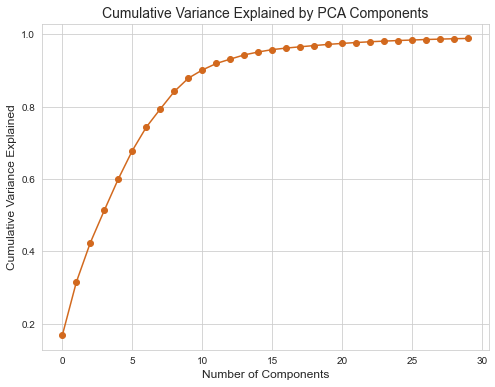

In [334]:
X=df.drop(columns=['Bankrupt?'])
pca1=PCA(n_components=30)
pca1.fit(X)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca1.explained_variance_ratio_), marker='o', linestyle='-', color='chocolate')

# Add labels and title
plt.xlabel("Number of Components", fontsize=12)
plt.ylabel("Cumulative Variance Explained", fontsize=12)
plt.title("Cumulative Variance Explained by PCA Components", fontsize=14)

# Add grid lines
plt.grid(True)
plt.savefig('PCA_variance.png')
# Show plot
plt.show()

In [330]:
variance_percent = pca1.explained_variance_ratio_
variance_percent_scaled = np.round((variance_percent * 100),2)

print(variance_percent_scaled)

[16.87 14.66 10.9   8.95  8.68  7.82  6.49  5.01  4.83  3.67  2.27  1.79
  1.22  1.16  0.8   0.66  0.43  0.35  0.34  0.33  0.27  0.24  0.22  0.18
  0.16  0.15  0.14  0.12  0.1   0.09]


In [342]:
#Get the names of original columns/features
original_feature_names = df_normalized.columns

#Get the loadings or components from PCA
components = pca1.components_

#Print out the names of components along with their loadings


sorted_indices = np.argsort(np.abs(component))[::-1]
for j in sorted_indices[:1]: 
    # Print the top 5 contributors to the component
    print(f"{original_feature_names[j]}: {component[j]}")


Total Asset Turnover: 0.5214225985233697


In [ ]:
#Total Asset Turnover is explaining maximum variance

<div style="color:white;
           display:fill;
           border-radius:25px;
           background-color:red;
           font-size:160%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          text-align:left;"
          >
      Model Building
</p>
</div>


In [359]:
X_pca = pca1.fit_transform(X)
y=df['Bankrupt?']

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [361]:
from sklearn.metrics import accuracy_score

In [81]:
np.set_printoptions(suppress=True)

In [380]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score,recall_score

In [382]:
# Step 4: Train a supervised learning model (example with Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [383]:
# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.86
Recall: 0.12


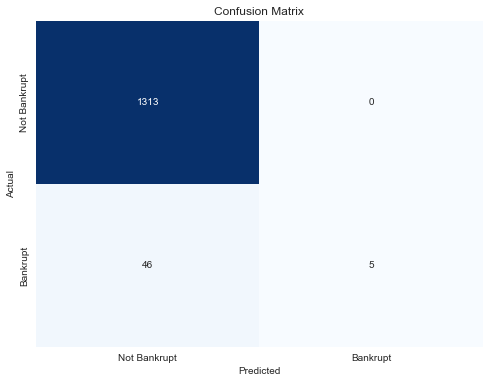

In [376]:
# Step 6: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Not Bankrupt', 'Bankrupt'], yticklabels=['Not Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('LogCM.png')
plt.show()



In [384]:
# Step 4: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


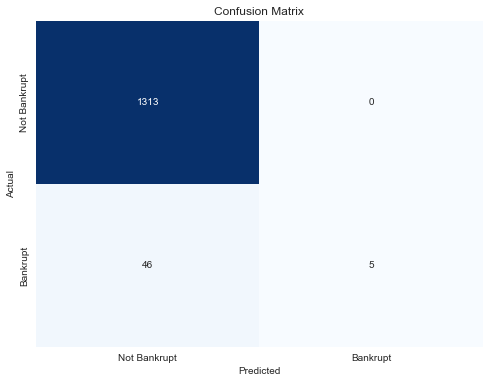

In [385]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Not Bankrupt', 'Bankrupt'], yticklabels=['Not Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('RFCM.png')
plt.show()


In [386]:
# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 1.00
Recall: 0.10
